In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
import yfinance as yf


In [3]:
spy = yf.Ticker("SPY")

In [5]:
spy_price = spy.history(period="max")

In [7]:
spy_price.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits      int64
dtype: object

In [10]:
spy_price = spy_price.reset_index()

In [24]:
spy_price['month'] = spy_price['Date'].dt.to_period('M')

In [130]:
spy_price.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,month
0,1993-01-29,26.098207,26.098207,25.968366,26.079659,1003200,0.0,0,1993-01
1,1993-02-01,26.098205,26.265144,26.098205,26.265144,480500,0.0,0,1993-02
2,1993-02-02,26.246586,26.339331,26.190940,26.320782,201300,0.0,0,1993-02
3,1993-02-03,26.357880,26.617563,26.339331,26.599014,529400,0.0,0,1993-02
4,1993-02-04,26.691763,26.765958,26.394982,26.710312,531500,0.0,0,1993-02


In [31]:
spy_price_monthly = spy_price.groupby('month').agg({'Close':'first'}).reset_index()

In [37]:
spy_price_monthly = spy_price_monthly.sort_values('month', ascending=False)

In [38]:
spy_price_monthly['diff'] = spy_price_monthly['Close'].diff()

In [40]:
spy_price_monthly['pct_change'] = spy_price_monthly.eval('-diff/Close')

In [49]:
R = np.array(list(spy_price_monthly['pct_change'])[1:])

In [56]:
ans = 1
n = len(R)/12.0
for i in range(len(R)):
    ans = ans * (R[i]+1)

In [58]:
mu = np.power(ans,1.0/n) - 1

In [60]:
sigma = np.sqrt(12*np.var(R))

In [62]:
print(mu, sigma)

0.09549370636413324 0.1581884165164392


In [65]:
n_month = len(R)

In [76]:
final_list = []
for _ in range(1000):
    years = 10
    xi = np.random.normal(size = years*12)
    dt = 1.0/12
    RHS = mu*dt + sigma*np.sqrt(dt)*xi
    S = [1]
    for i in range(len(RHS)):
        S.append((RHS[i]+1) * S[-1])
    final_list.append(S)

In [78]:
S_price = np.array(final_list)

In [88]:
print(np.mean(S_price[:,-1]), np.percentile(S_price[:,-1],50), np.percentile(S_price[:,-1],95))

2.56362072636044 2.251577943302487 5.085146536299163


In [89]:
print(np.percentile(S_price[:,-1],5), np.percentile(S_price[:,-1],95))

0.9884452838402515 5.085146536299163


In [90]:
final_list = []
for _ in range(1000):
    years = 10
    xi = np.random.normal(size = years*12)
    dt = 1.0/12
    RHS = mu*dt + sigma*np.sqrt(dt)*xi
    S = [100]
    for i in range(len(RHS)):
        S.append((RHS[i]+1) * S[-1] + 10)
    final_list.append(S)

In [91]:
S_price = np.array(final_list)

In [123]:
df = pd.DataFrame(S_price).T

In [125]:
df.columns[0]

0

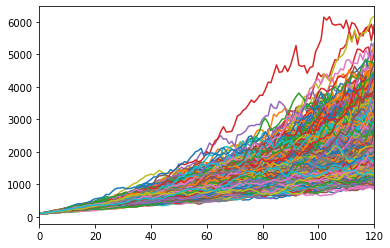

In [129]:
fig = plt.figure()
ax = plt.axes()

for i in range(1000):
    df[i].plot(ax=ax)
#plt.legend()